# Chapter 2

*Modeling and Simulation in Python*

Copyright 2021 Allen Downey

License: [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/)

In [1]:
# check if the libraries we need are installed
    
try:
    import pint
except ImportError:
    !pip install pint
    import pint
    
try:
    import modsim
except ImportError:
    !pip install modsimpy
    from modsim import *

# Bike share

This chapter presents a simple model of a bike share system and
demonstrates the features of Python we'll use to develop simulations of
real-world systems.

Along the way, we'll make decisions about how to model the system. In
the next chapter we'll review these decisions and gradually improve the
model.

## Modeling

Imagine a bike share system for students traveling between Olin College
and Wellesley College, which are about 3 miles apart in eastern
Massachusetts.

Suppose the system contains 12 bikes and two bike racks, one at Olin and
one at Wellesley, each with the capacity to hold 12 bikes.

As students arrive, check out a bike, and ride to the other campus, the
number of bikes in each location changes. In the simulation, we'll need
to keep track of where the bikes are. To do that, we'll use a function called `State`, which is defined in the ModSim library.
We can import it like this.

In [2]:
from modsim import State

Now we can call it like this:

In [3]:
bikeshare = State(olin=10, wellesley=2)

The expressions in parentheses are **keyword arguments**.
They create two variables, `olin` and `wellesley`, and give them values.

Then we call the `State` function.
The result is a `State` object, which is a collection of **state variables**.

In this example, the state variables represent the number of
bikes at each location. The initial values are 10 and 2, indicating that there are 10 bikes at Olin and 2 at Wellesley. 

The `State` object is assigned to a new variable named `bikeshare`.
We can read the variables inside a `State` object using the **dot
operator**, like this:

In [4]:
bikeshare.olin

10

And this:

In [5]:
bikeshare.wellesley

2

Or, to display the state variables and their values, you can just type the name of the object:

In [6]:
bikeshare

,values
olin,10
wellesley,2


These values make up the **state** of the system.
We can update the state by assigning new values to the variables. 
For example, if a student moves a bike from Olin to Wellesley, we can figure out the new values and assign them:

In [7]:
bikeshare.olin = 9
bikeshare.wellesley = 3

Or we can use **update operators**, `-=` and `+=`, to subtract 1 from
`olin` and add 1 to `wellesley`:

In [8]:
bikeshare.olin -= 1
bikeshare.wellesley += 1

The result is the same either way.

## Defining functions

So far we have used functions defined in NumPy and ModSim. Now we're going to define our own function.

When you are developing code in Jupyter, it is often efficient to write a few lines of code, test them to confirm they do what you intend, and then use them to define a new function. For example, these lines move a bike from Olin to Wellesley:

In [9]:
bikeshare.olin -= 1
bikeshare.wellesley += 1

Rather than repeat them every time a bike moves, we can define a new
function:

In [10]:
def bike_to_wellesley():
    bikeshare.olin -= 1
    bikeshare.wellesley += 1

`def` is a special word in Python that indicates we are defining a new
function. The name of the function is `bike_to_wellesley`. The empty
parentheses indicate that this function requires no additional
information when it runs. The colon indicates the beginning of an
indented **code block**.

The next two lines are the **body** of the function. They have to be
indented; by convention, the indentation is 4 spaces.

When you define a function, it has no immediate effect. The body of the
function doesn't run until you **call** the function. Here's how to call
this function:

In [11]:
bike_to_wellesley()

When you call the function, it runs the statements in the body, which
update the variables of the `bikeshare` object; you can check by
displaying the new state.

In [12]:
bikeshare

,values
olin,6
wellesley,6


When you call a function, you have to include the parentheses. If you
leave them out, you get this:

In [13]:
bike_to_wellesley

<function __main__.bike_to_wellesley()>

This result indicates that `bike_to_wellesley` is a function. You don't
have to know what `__main__` means, but if you see something like this,
it probably means that you looked up a function but you didn't actually
call it. So don't forget the parentheses.

## Print statements

As you write more complicated programs, it is easy to lose track of what
is going on. One of the most useful tools for debugging is the **print
statement**, which displays text in the Jupyter notebook.

Normally when Jupyter runs the code in a cell, it displays the value of
the last line of code. For example, if you run:

In [14]:
bikeshare.olin
bikeshare.wellesley

6

Jupyter runs both lines, but it only displays the value of the
second. If you want to display more than one value, you can use
print statements:

In [15]:
print(bikeshare.olin)
print(bikeshare.wellesley)

6
6


When you call the `print` function, you can put a variable name in
parentheses, as in the previous example, or you can provide a sequence
of variables separated by commas, like this:

In [16]:
print(bikeshare.olin, bikeshare.wellesley)

6 6


Python looks up the values of the variables and displays them; in this
example, it displays two values on the same line, with a space between
them.

Print statements are useful for debugging functions. For example, we can
add a print statement to `move_bike`, like this:

In [17]:
def bike_to_wellesley():
    print('Moving a bike to Wellesley')
    bikeshare.olin -= 1
    bikeshare.wellesley += 1

Each time we call this version of the function, it displays a message,
which can help us keep track of what the program is doing.
The message in this example is a **string**, which is a sequence of
letters and other symbols in quotes.

Just like `bike_to_wellesley`, we can define a function that moves a
bike from Wellesley to Olin:

In [18]:
def bike_to_olin():
    print('Moving a bike to Olin')
    bikeshare.wellesley -= 1
    bikeshare.olin += 1

And call it like this:

In [19]:
bike_to_olin()

Moving a bike to Olin


One benefit of defining functions is that you avoid repeating chunks of
code, which makes programs smaller. Another benefit is that the name you
give the function documents what it does, which makes programs more
readable.

## If statements

The ModSim library provides a function called `flip`, which we can import like this:

In [20]:
from modsim import flip

When you call it, you provide a probability between 0 and 1, like `0.7`, as an example:

In [21]:
flip(0.7)

False

The result is one of two values: `True` with probability 0.7 or `False`
with probability 0.3. If you run `flip` like this 100 times, you should
get `True` about 70 times and `False` about 30 times. But the results
are random, so they might differ from these expectations.

`True` and `False` are special values defined by Python. Note that they
are not strings. There is a difference between `True`, which is a
special value, and `'True'`, which is a string.

`True` and `False` are called **boolean** values because they are
related to Boolean algebra (<https://modsimpy.com/boolean>).

We can use boolean values to control the behavior of the program, using
an **if statement**:

In [22]:
if flip(0.5):
    print('heads')

If the result from `flip` is `True`, the program displays the string
`'heads'`. Otherwise it does nothing.

The syntax for `if` statements is similar to the syntax for
function definitions: the first line has to end with a colon, and the
lines inside the `if` statement have to be indented.

Optionally, you can add an **else clause** to indicate what should
happen if the result is `False`:

In [23]:
if flip(0.5):
    print('heads')
else:
    print('tails')    

tails


Now we can use `flip` to simulate the arrival of students who want to
borrow a bike. Suppose students arrive at the Olin station every 2
minutes, on average. In that case, the chance of an arrival during any
one-minute period is 50%, and we can simulate it like this:

In [24]:
if flip(0.5):
    bike_to_wellesley()

If students arrive at the Wellesley station every 3 minutes, on average,
the chance of an arrival during any one-minute period is 33%, and we can
simulate it like this:

In [25]:
if flip(0.33):
    bike_to_olin()

We can combine these snippets into a function that simulates a **time
step**, which is an interval of time, in this case one minute:

In [26]:
def step():
    if flip(0.5):
        bike_to_wellesley()
    
    if flip(0.33):
        bike_to_olin()

Then we can simulate a time step like this:

In [27]:
step()

Moving a bike to Wellesley
Moving a bike to Olin


Even though there are no values in parentheses, we have to include them.

## Parameters

The previous version of `step` is fine if the arrival probabilities
never change, but in reality, these probabilities vary over time.

So instead of putting the constant values 0.5 and 0.33 in `step` we can replace them with **parameters**. Parameters are variables whose values are set when a function is called.

Here's a version of `step` that takes two parameters, `p1` and `p2`:

In [28]:
def step(p1, p2):
    if flip(p1):
        bike_to_wellesley()
    
    if flip(p2):
        bike_to_olin()

The values of `p1` and `p2` are not set inside this function; instead,
they are provided when the function is called, like this:

In [29]:
step(0.5, 0.33)

Moving a bike to Wellesley


The values you provide when you call the function are called
**arguments**. The arguments, `0.5` and `0.33` in this example, get
assigned to the parameters, `p1` and `p2`, in order. So running this
function has the same effect as:

In [30]:
p1 = 0.5
p2 = 0.33

if flip(p1):
    bike_to_wellesley()
    
if flip(p2):
    bike_to_olin()

Moving a bike to Wellesley


The advantage of using parameters is that you can call the same function many times, providing different arguments each time.

Adding parameters to a function is called **generalization**, because it makes the function more general, that is, less specialized.

## For loops

At some point you will get sick of running cells over and over.
Fortunately, there is an easy way to repeat a chunk of code, the **for
loop**. Here's an example:

In [31]:
for i in range(1, 4):
    print(i)
    bike_to_wellesley()

1
Moving a bike to Wellesley
2
Moving a bike to Wellesley
3
Moving a bike to Wellesley


The syntax here should look familiar; the first line ends with a
colon, and the lines inside the `for` loop are indented. The other
elements of the loop are:

-   The words `for` and `in` are special words we have to use in a for
    loop.

-   `range` is a Python function we're using here to control the number of times the loop runs.

-   `i` is a **loop variable** that gets created when the for loop runs.

When this loop runs, it runs the statements inside the loop three times.  The first time, the value of `i` is `1`; the second time, it is `2`; the third time, it is `3`.

Each time through the loop, it prints the value of `i` and moves one bike Olin to Wellesley.

It might seem strange that the loop stops when `i` is `3`, but that's how `range` works: it includes the first argument, `1`, but not the second, `4`.

Now, since we have moved a number of bikes around, let's start again with a new `State` object.

In [32]:
bikeshare = State(olin=10, wellesley=2)

We'll use this `bikeshare` in the next section.

## TimeSeries

When we run a simulation, we often want to save the results for later analysis. The ModSim library provides a `TimeSeries` object for this purpose. A `TimeSeries` contains a sequence of time stamps and a
corresponding sequence of values. In this example, the time stamps are
integers representing minutes, and the values are the number of bikes at one location.

We can create a new, empty `TimeSeries` like this:

In [33]:
from modsim import TimeSeries

results = TimeSeries()

And we can add a value to a `TimeSeries` like this:

In [34]:
results[0] = bikeshare.olin

The number in brackets is the time stamp, also called a **label**.

We can use a `TimeSeries` inside a for loop to store the results of the
simulation:

In [35]:
for i in range(1, 5):
    print(i)
    step(0.3, 0.2)
    results[i] = bikeshare.olin

1
Moving a bike to Wellesley
2
3
4


Each time through the loop, we print the value of `i` and call `step`, which updates `bikeshare`.
Then we store the number of bikes at Olin in `results`. 
We use the loop variable, `i`, as the time stamp.

When the loop exits, `results` contains 5 time stamps, from 0 through
4, and the number of bikes at Olin at the end of each time step.

We can display the `TimeSeries` like this:

In [36]:
results

0    10
1     9
2     9
3     9
4     9
dtype: int64

The left column displays the timestamps; the right column displays the values (which might be negative, depending on the state of the system).
At the bottom, `dtype` is the type of the data in the `TimeSeries`; you can ignore this for now.

ModSim provides a function called `display` that displays the `TimeSeries` as a table:

In [37]:
from modsim import display

display(results)

,values
0,10
1,9
2,9
3,9
4,9


You don't have to use `display`, but I think it looks better.

## Plotting

ModSim provides a function called `plot` we can use to plot
the results:

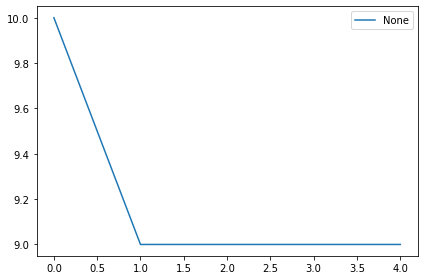

In [38]:
from modsim import plot

plot(results)

The legend for this figure says "None" because we have not provided a label.  Here's how we can do that:

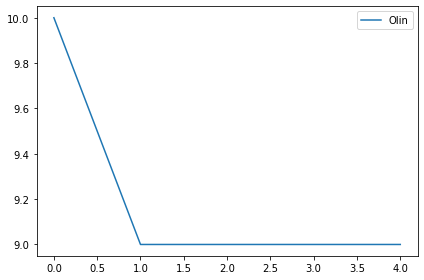

In [39]:
plot(results, label='Olin')

Whenever you make a figure, you should label the axes. The ModSim
library provides `decorate`, which we can use to labels the axes and give the figure a title:

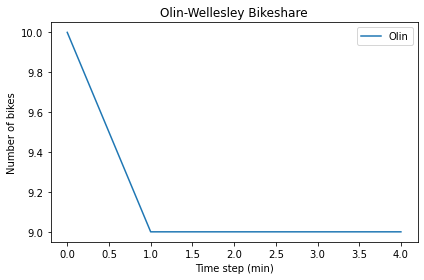

In [40]:
from modsim import decorate

plot(results, label='Olin')

decorate(title='Olin-Wellesley Bikeshare',
         xlabel='Time step (min)', 
         ylabel='Number of bikes')

## Summary

This chapter introduces the tools we need to run simulations, record the results, and plot them.

We used a `State` object to represent the state of the system.
Then we used the `flip` function and an `if` statement to simulate a single time step.

We used `for` loop to simulate a series of steps, and a `TimeSeries` to record the results.

Finally, we used `plot` and `decorate` to plot the results.

In the next chapter, we will extend this simulation to make it a little more realistic.

## Exercises

**Exercise:** What happens if you spell the name of a state variable wrong?  Edit the following cell, change the spelling of `wellesley`, and run it.

The error message uses the word "attribute", which is another name for what we are calling a state variable. 

In [41]:
bikeshare = State(olin=10, wellesley=2)

bikeshare.wellesley

2

**Exercise:** Make a `State` object with a third state variable, called `babson`, with initial value 0, and display the state of the system.

In [42]:
# Solution

bikeshare = State(olin=10, wellesley=2, babson=0)
bikeshare

,values
olin,10
wellesley,2
babson,0


**Exercise:** Wrap the code in the chapter in a function named `run_simulation` that takes three parameters, named `p1`, `p2`, and `num_steps`.

It should:

1. Create a `TimeSeries` object to hold the results.

2. Use a for loop to run `step` the number of times specified by `num_steps`, passing along the specified values of `p1` and `p2`.

3. After each step, it should save the number of bikes at Olin in the `TimeSeries`.

4. After the for loop, it should plot the results and

5. Decorate the axes.

To test your function:

1. Create a `State` object with the initial state of the system.

2. Call `run_simulation` with appropriate parameters.

In [43]:
# Solution

def run_simulation(p1, p2, num_steps):
    results = TimeSeries()
    results[0] = bikeshare.olin
    
    for i in range(1, num_steps):
        step(p1, p2)
        results[i] = bikeshare.olin
        
    plot(results, label='Olin')
    decorate(title='Olin-Wellesley Bikeshare',
             xlabel='Time step (min)', 
             ylabel='Number of bikes')

Moving a bike to Olin
Moving a bike to Olin
Moving a bike to Wellesley
Moving a bike to Wellesley
Moving a bike to Wellesley
Moving a bike to Olin
Moving a bike to Wellesley
Moving a bike to Wellesley
Moving a bike to Wellesley
Moving a bike to Wellesley
Moving a bike to Wellesley
Moving a bike to Olin
Moving a bike to Wellesley
Moving a bike to Wellesley
Moving a bike to Wellesley
Moving a bike to Wellesley
Moving a bike to Wellesley
Moving a bike to Wellesley
Moving a bike to Olin
Moving a bike to Wellesley
Moving a bike to Wellesley
Moving a bike to Olin
Moving a bike to Olin
Moving a bike to Wellesley
Moving a bike to Wellesley
Moving a bike to Olin
Moving a bike to Olin
Moving a bike to Wellesley
Moving a bike to Wellesley
Moving a bike to Olin
Moving a bike to Wellesley
Moving a bike to Wellesley


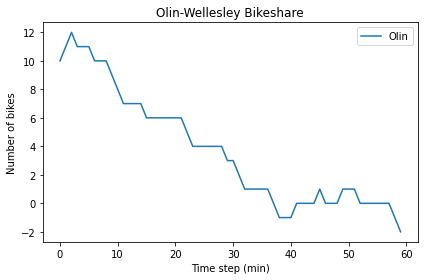

In [44]:
# Solution

bikeshare = State(olin=10, wellesley=2)
run_simulation(0.3, 0.2, 60)

## Opening the hood

This section contains additional information about the functions we've used an pointers to their documentation.

You don't need to know anything in these sections, so if you are already feeling overwhelmed, you might want to skip them.  But if you are curious, read on.

The `State` object defined in the ModSim library, is based on the `SimpleNamespace` object defined in a standard Python library called `types`; the documentation is at <https://docs.python.org/3.7/library/types.html#types.SimpleNamespace>.

The `TimeSeries` object is based on the `Series` object defined by a library called Pandas.
The documentation is at <https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html>.

`display` works by creating another Pandas object, called a `DataFrame`, which can be displayed as a table.
We'll use `DataFrame` objects in future chapters.

`Series` objects provide their own `plot` function, but the syntax is different from the other functions we've used, so ModSim provides a function called `plot` just to make it consistent.

`decorate` is based on Matplotlib, which is most widely-used plotting function for Python.  Matplotlib provides separate functions for `title`, `xlabel`, and `ylabel`.
`decorate` makes them a little easier to use.

The `flip` function uses NumPy's `random` function to generate a random number between 0 and 1, then returns `True` or `False` with the given probability.

You can get the source code for `flip` by running the following cell.

In [45]:
from modsim import source_code

source_code(flip)

def flip(p=0.5):
    """Flips a coin with the given probability.

    p: float 0-1

    returns: boolean (True or False)
    """
    return np.random.random() < p



You might not understand everything in this function yet, but you will.